In [24]:
import numpy as np
import matplotlib.pyplot as plt
lim = 7
# Define the system of ODEs
def vector_field(x, y):
    dx = -x + 4 * y - 2
    dy = 5 * x - 2 * y - 8
    return dx, dy

# RK4 solver for the system of ODEs
def rk4_step(x, y, dt):
    dx1, dy1 = vector_field(x, y)
    dx2, dy2 = vector_field(x + 0.5 * dx1 * dt, y + 0.5 * dy1 * dt)
    dx3, dy3 = vector_field(x + 0.5 * dx2 * dt, y + 0.5 * dy2 * dt)
    dx4, dy4 = vector_field(x + dx3 * dt, y + dy3 * dt)
    
    x_next = x + (dx1 + 2 * dx2 + 2 * dx3 + dx4) * dt / 6
    y_next = y + (dy1 + 2 * dy2 + 2 * dy3 + dy4) * dt / 6
    return x_next, y_next

# Create a grid of points for the vector field
x = np.linspace(-lim, lim, 20)
y = np.linspace(-lim, lim, 20)
X, Y = np.meshgrid(x, y)

# Compute the vector field on the grid
U, V = vector_field(X, Y)

# Normalize the vectors for better visualization
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude



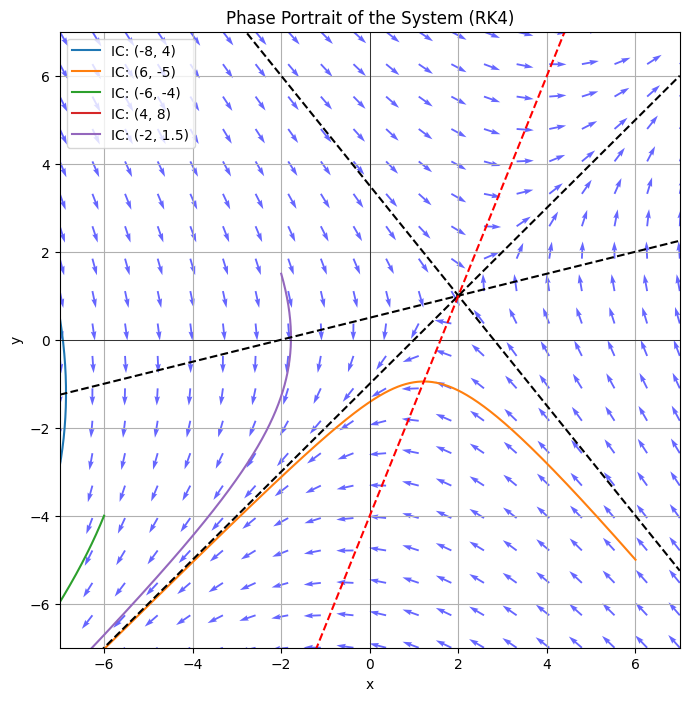

In [34]:
# Add trajectories using RK4 for initial conditions
initial_conditions = [(-8, 4), (6, -5), (-6, -4), (4, 8),(-2,3/2)]
t = np.linspace(0, 1, 1000)


def do_plot():
      # Smaller time range
    dt = t[1] - t[0]

    plt.figure(figsize=(8, 8))
    for x0, y0 in initial_conditions:
        x, y = [x0], [y0]
        for _ in t[1:]:
            x_next, y_next = rk4_step(x[-1], y[-1], dt)
            x.append(x_next)
            y.append(y_next)
        plt.plot(x, y, label=f'IC: ({x0}, {y0})')

    # Plot the vector field
    
    plt.quiver(X, Y, U, V, color='blue', alpha=0.6)
    # Set axis limits
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Phase Portrait of the System (RK4)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

def add_isoclines():
    # Plot y = 1/4 x + 1/2
    x_line = np.linspace(-lim, lim, 100)  # Generate x-values
    y_line = 1/4 * x_line + 1/2        # Compute corresponding y-values
    plt.plot(x_line, y_line, 'k--', label=r'$y = \frac{1}{4}x + \frac{1}{2}$')  # Dashed black line

    y_line = -5/4 * x_line + 7/2        # Compute corresponding y-values
    plt.plot(x_line, y_line, 'k--', label=r'$y = \frac{-5}{4}x + \frac{7}{2}$')  # Dashed black line

    y_line = x_line -1       # Compute corresponding y-values
    plt.plot(x_line, y_line, 'k--', label=r'$y = \frac{-5}{4}x + \frac{7}{2}$')  # Dashed black line

    y_line = 5/2 * x_line - 4      # Compute corresponding y-values
    plt.plot(x_line, y_line, 'r--', label=r'$y = \frac{-5}{4}x + \frac{7}{2}$')  # Dashed black line





do_plot()
add_isoclines()